<a href="https://colab.research.google.com/github/subbu27iitb/Time-Series/blob/main/T_ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARIMA Model Time series forecasting...Sample Python code.\
Reference:\
https://www.youtube.com/watch?v=8FCDpFhd1zk

https://medium.com/swlh/temperature-forecasting-with-arima-model-in-python-427b2d3bcb53

ARIMA Model Time series forecasting...Sample Python code.. 

**1. Check.. "df.dropna()"\
    *check argument... "parse_dates=True"\
**2. Practice .. "figsize()" function to change the size of plot. Which lib it (doesn't) works\
  *check plotly plot of the same\
**3. Understand ADF function outputs for stationarity test. How does the lesser p-value makes the distribution more stationary ?\
**4. What is "AIC" in auto-ARIMA function execution ?\
**5. Check df.iloc[:-30] and df.iloc[-30:]\
**6. Check changinging the index from date to a serial number (S.NO.). pred.index=df.index[start:end+1]\
**7. Check pd.date_range(start='start_date', end='end_date') ..to print the future dates and check pred.index=new index... to assign new index dataframe.

**"pmdarima" library contains "auto_arima" function which is used to find the order of ARIMA i.e., (p,d,q).**

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.7 MB/s 
     |████████████████████████████████| 9.8 MB 40.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
from google.colab import files
upload =files.upload()

Saving Mounaloa_Daily_Temp.csv to Mounaloa_Daily_Temp.csv


In [26]:
import pandas as pd
df=pd.read_csv("Mounaloa_Daily_Temp.csv", index_col="DATE", parse_dates=True)
df=df.dropna()
print(df.shape)
df.head()
#print(df.iloc[136,:])

(1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


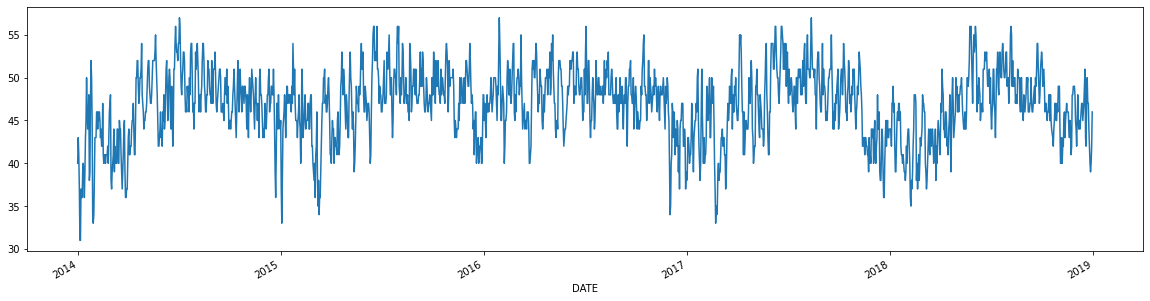

In [32]:
df["AvgTemp"].plot(figsize=(20,5))

**Check For Stationarity**\
If p<0.05; Data Stationary\
If p>0.05; Data is not Stationary

In [34]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
         
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068778
2. P-Value :  8.675937480199557e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


**FInd order of ARIMA (p,d,q)**

In [36]:
from pmdarima import auto_arima
auto_arima_fit= auto_arima(df["AvgTemp"], trace=True)
auto_arima_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.803, Time=5.75 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.36 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.59 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.117, Time=3.52 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.613, Time=3.59 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.191, Time=3.44 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.479, Time=4.19 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.193, Time=4.43 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.480, Time=4.94 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8307.633, Time=4.63 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.359
Date:                Wed, 06 Jul 2022   AIC                           8294.718
Time:                        21:04:21   BIC                           8338.775
Sample:                             0   HQIC                          8310.972
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2372      0.370      3.340      0.001       0.511       1.963
ar.L1          0.9735      0.008    122.232      0.000       0.958       0.989
ma.L1         -0.1244      0.024     -5.233      0.000      -0.171      -0.078
ma.L2         -0.2191      0.024     -9.056      0.000      -0.266      -0.172
ma.L3         -0.2073      0.024     -8.649      0.000      -0.254      -0.160
ma.L4         -0.1360      0.023     -5.959      0.000      -0.181      -0.091
ma.L5         -0.0485      0.024     -1.987      0.047      -0.096      -0.001
sigma2         5.5112      0.173     31.871      0.000       5.172       5.850
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.49
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Test-train split**

In [38]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape, test.shape)

(1821, 5)
(1791, 5) (30, 5)


**Apply ARIMA on test model using order (p,d,q) = (1,0,5)**

In [60]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train["AvgTemp"], order=(1,0,5))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Wed, 06 Jul 2022   AIC                           8156.395
Time:                        21:29:11   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Prediction on test data**

In [61]:
start = len(train)
end = len(train)+len(test)-1
pred= model.predict(start=start, end=end, typ='levels')
#print(pred)
pred.index=df.index[start:end+1]
print(pred)

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721546
2018-12-05    45.863733
2018-12-06    45.874127
2018-12-07    45.884370
2018-12-08    45.894467
2018-12-09    45.904418
2018-12-10    45.914225
2018-12-11    45.923892
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952064
2018-12-15    45.961186
2018-12-16    45.970176
2018-12-17    45.979037
2018-12-18    45.987770
2018-12-19    45.996378
2018-12-20    46.004861
2018-12-21    46.013223
2018-12-22    46.021464
2018-12-23    46.029586
2018-12-24    46.037592
2018-12-25    46.045482
2018-12-26    46.053259
2018-12-27    46.060923
2018-12-28    46.068478
2018-12-29    46.075923
2018-12-30    46.083262
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


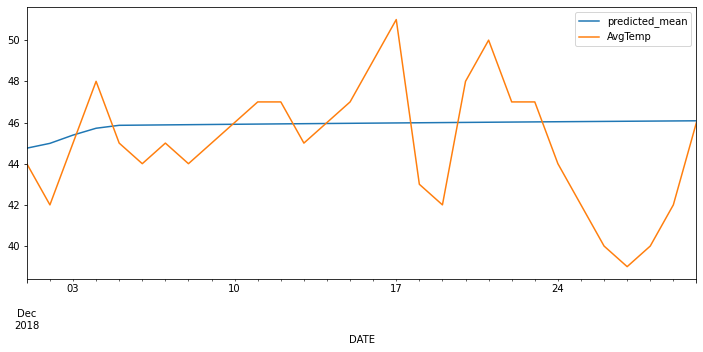

In [62]:
pred.plot(figsize=(12,5),legend=True)
test["AvgTemp"].plot(legend=True)

**Check Accuracy Metric**

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test["AvgTemp"]))
print("RMSE: ", rmse)
print("Mean: ", test["AvgTemp"].mean())

RMSE:  3.000464039240764
Mean:  45.0


**Predict Future 30 days**

In [67]:
model2 = ARIMA(df["AvgTemp"], order=(1,0,5))
model2=model2.fit()
df.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116915
2019-01-04    45.136666
2019-01-05    45.156140
2019-01-06    45.175341
2019-01-07    45.194274
2019-01-08    45.212942
2019-01-09    45.231349
2019-01-10    45.249498
2019-01-11    45.267393
2019-01-12    45.285038
2019-01-13    45.302436
2019-01-14    45.319591
2019-01-15    45.336505
2019-01-16    45.353183
2019-01-17    45.369627
2019-01-18    45.385842
2019-01-19    45.401829
2019-01-20    45.417593
2019-01-21    45.433136
2019-01-22    45.448462
2019-01-23    45.463573
2019-01-24    45.478473
2019-01-25    45.493165
2019-01-26    45.507650
2019-01-27    45.521934
2019-01-28    45.536017
2019-01-29    45.549903
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


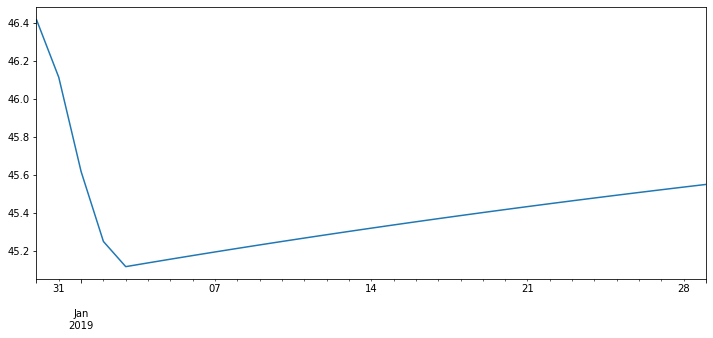

In [72]:
index_future_dates = pd.date_range(start="2018-12-30", end="2019-01-29")
#print(index_future_dates)
pred_future= model2.predict(start=len(df), end=len(df)+30, typ='levels')
pred_future.index=index_future_dates
print(pred_future)

pred_future.plot(figsize=(12,5))
